In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [3]:
wheel = ["#ff0000", "#ff6000", "#00ff00", "#41f0ae", "#55a0fb", "#5757f9", "#b856d7", "#f96495"]
fn = lambda x: tuple(int(x.lstrip("#")[i:i+2], 16)/255 for i in (0, 2, 4))
wheel = plt.cycler("color", [fn(h)+(1,) for h in wheel])

plt.style.use('fig.yaml')
plt.rcParams['axes.prop_cycle'] = wheel

In [48]:
def plot(x, means, stds, mapping, labels, save_path=None):
    fig, ax = plt.subplots()

    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

    for i, (mean, std) in enumerate(zip(means, stds)):
        name = mean[0]
        ax.errorbar(x, mean[1], yerr=std[1], linewidth=0.5, markersize=2, fmt='-o', label=mapping[name], capsize=1, zorder = len(mapping) / (i+1))
        ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
#         ax.set_ylim(0, 1)
#         ax.set_xlim(0, 1)
        ax.tick_params(axis='both', which='major', labelsize=7.25)

        ax.set_title(labels["title"], weight="bold")
        ax.set_xlabel(labels["x"])
        ax.set_ylabel(labels["y"])

    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    ax.legend(handles, labels, bbox_to_anchor=(1.04,0.5), loc="center left", numpoints=1)
    
    if save_path:
        plt.savefig(save_path)

In [49]:
# alexnet data and layer mappings
data = pd.read_csv("../data/perturbation-experiments/20211101_081105-experiments.csv")
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
data.columns = data.columns.str.replace(' ', '')

alexnet_mapping = {
    "features.0": "conv1",
    "features.3": "conv2",
    "features.6": "conv3",
    "features.8": "conv4",
    "features.10": "conv5",
#     "classifier.1": "dense1",
#     "classifier.4": "dense2",
#     "classifier.6": "dense3"
}

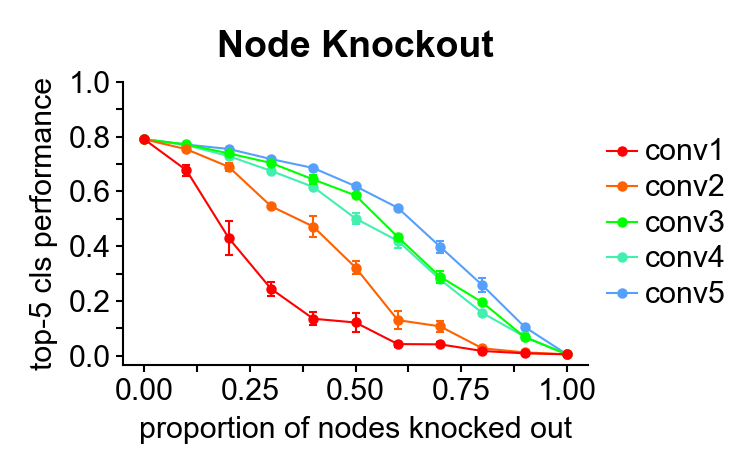

In [54]:
# alexnet node knockout
labels = {
    "title": "Node Knockout",
    "x": "proportion of nodes knocked out",
    "y": "top-5 cls performance"
}

tmp = data[data["level"] == "node"]
means = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).mean()
means = means.pivot(index="fraction", columns="layer", values="accuracy")
means = means.reindex(alexnet_mapping.keys(), axis=1)
means = [*means.iteritems()]

stds = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).sem()
stds = stds.pivot(index="fraction", columns="layer", values="accuracy")
stds = stds.reindex(alexnet_mapping.keys(), axis=1)
stds = [*stds.iteritems()]

xs = [x / 10 for x in range(0, 11)]

plot(xs, means, stds, alexnet_mapping, labels, save_path = "alexnet_node_knockout.pdf")

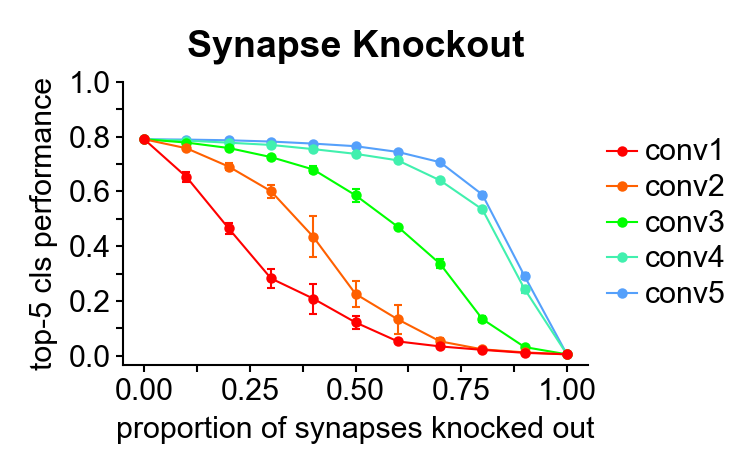

In [55]:
# alexnet synapse knockout
labels = {
    "title": "Synapse Knockout",
    "x": "proportion of synapses knocked out",
    "y": "top-5 cls performance"
}

tmp = data[data["level"] == "synapse"]
means = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).mean()
means = means.pivot(index="fraction", columns="layer", values="accuracy")
means = means.reindex(alexnet_mapping.keys(), axis=1)
means = [*means.iteritems()]

stds = tmp.groupby(["layer", "fraction"], sort=False, as_index=False).sem()
stds = stds.pivot(index="fraction", columns="layer", values="accuracy")
stds = stds.reindex(alexnet_mapping.keys(), axis=1)
stds = [*stds.iteritems()]

xs = [x / 10 for x in range(0, 11)]

plot(xs, means, stds, alexnet_mapping, labels, save_path = "alexnet_synapse_knockout.pdf")